# Evaluating the performance of slice fill methods in Go

We test the performance of three different methods of instantiating and filling a slice in Go.
1. **AppendToZeroCapacity** which instantiates a slice of length `0` and capacity `0` and repeatedly appends elements to it
2. **AppendToNCapacity** which instantiates a slice of length `0` and capacity `n` and repeatedly appends elements to it
3. **FillNLengthSlice** which instantiates a slice of length `n` and capacity `n` and assigns the elements to index `0` through `n-1`

The tests were conducted using Go's built-in benchmark testing feature (`go test --bench=.`). At least 5 trials were done per slice length (1, 10, 100, 500, 1000) and the ordering of the tests were shuffled in between trials.

## Implementation

**method 1**
```
func AppendToZeroCapacity(n int) []int {
	slice := make([]int, 0)
	for i := 0; i < n; i++ {
		slice = append(slice, i)
	}
	return slice
}

```

**method 2**
```
func AppendToNCapacity(n int) []int {
	slice := make([]int, 0, n)
	for i := 0; i < n; i++ {
		slice = append(slice, i)
	}
	return slice
}
```

**method 3**
```
func FillNLengthSlice(n int) []int {
	slice := make([]int, n)
	for i := 0; i < n; i++ {
		slice[i] = i
	}
	return slice
}

```

In [35]:
import pandas as pd

data = {
        'AppendToZeroCapacity (ns/op)': [13.77, 101.3, 347.3, 1032.0, 2171],
        'AppendToNCapacity (ns/op)':[9.159, 23.46, 126.6, 578.8, 1058],
        'FillNLengthSlice (ns/op)':[9.136, 22.19, 126.5, 548.6, 1045],
        }

slice_len = [1, 10, 100, 500, 1000]
df = pd.DataFrame(data, index=slice_len)

print(df.to_markdown()) 


|      |   AppendToZeroCapacity (ns/op) |   AppendToNCapacity (ns/op) |   FillNLengthSlice (ns/op) |
|-----:|-------------------------------:|----------------------------:|---------------------------:|
|    1 |                          13.77 |                       9.159 |                      9.136 |
|   10 |                         101.3  |                      23.46  |                     22.19  |
|  100 |                         347.3  |                     126.6   |                    126.5   |
|  500 |                        1032    |                     578.8   |                    548.6   |
| 1000 |                        2171    |                    1058     |                   1045     |


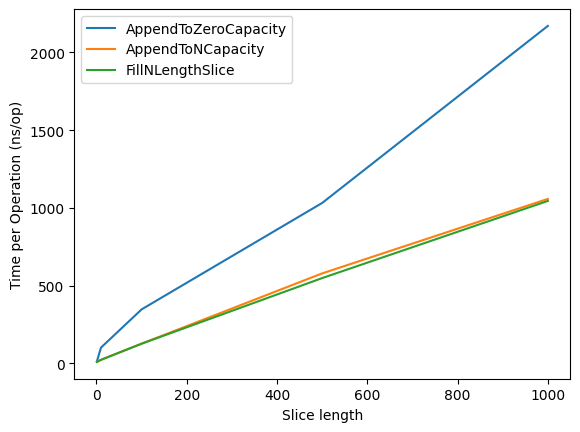

In [27]:
import matplotlib.pyplot as plt
import numpy as np
  
x = [1, 10, 100, 500, 1000]  # Length of slice to be created/filled
m1 = [13.77, 101.3, 347.3, 1032, 2171]
m2 = [9.159, 23.46, 126.6, 578.8, 1058]
m3 = [9.136, 22.19, 126.5, 548.6, 1045]
  
# plot lines
plt.plot(x, m1, label = "AppendToZeroCapacity")
plt.plot(x, m2, label = "AppendToNCapacity")
plt.plot(x, m3, label = "FillNLengthSlice")
plt.legend()
plt.xlabel("Slice length")
plt.ylabel("Time per Operation (ns/op)")
plt.show()

### Required Installation

In [21]:
!pip3 install pandas


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [9]:
!pip3 install matplotlib


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [10]:
!pip3 install numpy


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [30]:
!pip3 install tabulate


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
